# Coursework 1 - Mathematics for Machine Learning

## Due: 25/03/2025

## CID: 02056823

***
***

## Exercise 1: Quick questions [2 points]

#### Question 1:
We have that the moving average estimates for first and second moment are defined as:
$$
\mathbf{s}_t = \beta_1 \mathbf{s}_{t-1} + (1 - \beta_1) \hat{\mathbf{g}}
$$

$$
\mathbf{r}_t = \beta_2 \mathbf{r}_{t-1} + (1 - \beta_2) \hat{\mathbf{g}}^2
$$

Since $s_0 = r_0 = 0$ and $\beta_2 > \beta_1 = 0.9$, we have that $\mathbf{r}_t, \mathbf{s}_t$ are very small for small $t$, biased towards 0. 

The bias correction steps:

$$
\hat{\mathbf{s}}_t = \frac{\mathbf{s}_t}{1 - \beta_1^t}
$$

$$
\hat{\mathbf{r}}_t = \frac{\mathbf{r}_t}{1 - \beta_2^t}
$$

divide early estimates $\mathbf{r}_t, \mathbf{s}_t$ by a very small number $1 - \beta_i^t \; i = 1, 2$ for small t, hence correcting the bias.

As $t$ gets larger, $1 - \beta_i^t \; i = 1, 2$ converges to 1, getting rid of the correction

Without this correction, the algorithm would use underestimated moments, leading to smaller updates in the first few iterations, slowing down convergence.

More formally, note that we have $s_t = (1 - \beta_1) (g_t + g_{t-1} \beta_1 + ... + g_1 \beta_1^{t-1})$ and $ 1 - \beta^t = (1 - \beta) (1 + \beta + \dots + \beta^{t-1})$, so 
$$
\hat{s} = \frac{ (1 - \beta_1) (g_t + g_{t-1} \beta_1 + ... + g_1 \beta_1^{t-1})}{(1 - \beta_1) (1 + \beta_1 + \dots + \beta_1^{t-1})} 
$$

$$
= \frac{(g_t + g_{t-1} \beta_1 + ... + g_1 \beta_1^{t-1})}{(1 + \beta_1 + \dots + \beta_1^{t-1})}  = \sum_{i = 1}^t w_i g_i
$$

So with the correction, $\hat{s}$ becomes a weighted average of the gradients, with weights given by
$$
w_i = \frac{\beta_1^{t-i}}{\sum_{i=0}^{t-1} \beta_1^i}
$$

The same idea follows for the second moment estimates

#### Question 2:

GD Uses the entire dataset to compute the gradient before updating the parameters, whereas SGD uses a random minibatch to perform gradient descent each time.

GD has more stable updates, leading to smooth convergence, and guarantees convergence to a local minimum for convex problems.

But it is computationally expensive to compute gradients for large datasets, and often get stuck in saddle points if the loss is nonconvex.

SGD is much faster than GD, and it introduces noise that helps escape saddle points and local minima.

#### Question 3:

Consider the setup
$$
y = ReLU( \sum_{i=1}^{n} w_i x_i + b_i)
$$

where:
- $ w_i \sim \mathcal{N}(0, \sigma_n^2) $ (initialized weights),
- $ x_i $ are activations from the previous layer, with $\text{Var}(x_i)$ = $\sigma_x^2$
- $b_i$ are initialized to 0

We know
$$
E[\sum_{i=1}^{n} w_i x_i + b_i] = \sum_{i=1}^{n} E[w_i x_i] = 0
$$

$$
\text{Var}[\sum_{i=1}^{n} w_i x_i + b_i] = \sum_{i=1}^{n} \text{Var}[w_i x_i] = n \sigma_n^2 \sigma_x^2
$$

by zero mean of $ w_i $, and independence of $ w_i $ and $ x_i $

We also know that ReLU halves the variance. Denote $ReLU(x) = \sigma(x)$, and for any $X$ of zero mean:

$$
Var(\sigma(X)) = \int_0^\infty X^2 dP = \frac{1}{2} E[X^2] = \frac{1}{2} Var(X)
$$

Hence 
$$
Var(y) = \frac{1}{2} Var(\sum wx) = \frac{n}{2} \sigma_n^2 \sigma_x^2
$$

To preserve variance across layers, we want $Var(y) = \sigma_x^2$:

$$
\frac{n}{2} \sigma_n^2 = 1
$$

which gives:

$$
\sigma_n^2 = \frac{2}{n}
$$

Thus, the standard deviation is:

$$
\sigma_n = \sqrt{\frac{2}{n}}
$$


#### Question 4:

To prove theorem 4.2, we need to prove lemma 4.4: piecewise constant approximation, where we need the assumption of $g$ be $\rho$ -Lipschitz to 
$$
|g(x) - g(y)| \leq \rho \|x - y\|, \quad \forall x, y \in [0,1]^d.
$$
Otherwise there could be regions where $g$ varies arbitrarily fast.

Specifically,
$\rho$-Lipschitz continuity of $g$ ensures existence of $h = \sum_{i=1}^m \alpha_i \mathbf{1}_{R_i}$ that approximates $g$ such that $\sup_{x\in [0,1)^d} \|g(x) - h(x)\| \leq \epsilon$.

Let $k= \lceil \frac{\rho}{(\epsilon \sqrt{d})} \rceil, m = k^d$, $\mathcal{P} = (R_1,...,R_m)$ be partition as defined in the lemma.
With lipschitz condition, we have

$$
|g(x) - h(x)| = |g(x) - g(u_j)| \leq \rho ||x - u_j||_2 \leq \epsilon $$

so that
$$
\sup_{x \in [0, 1]} |g(x) - h(x)| \leq \epsilon
$$

*** 
***

## Exercise 2: [6 points]


### Question 1 [2 points]


We have the Stone-Weierstrass conditions:

1.  Continuity: Each $ f \in \mathcal{F}_{\cos,d} $ is continuous because cosine is a continuous function, and linear transformations and summations preserve continuity

2.  Non-triviality: For each $ x $,
   $$
   \cos(0^\top x) = \cos(0) = 1 \neq 0.
   $$

3.  Separability: For each $ x \neq x' $, define:
   $$
   f(z) := \cos\left(\frac{(z - x')^\top (x - x')}{\|x - x'\|^2} \right) \in \mathcal{F}_d.
   $$

   Evaluating at $ x $ and $ x' $:

   $$
   f(x) = \cos(1) \neq \cos(0) = f(x').
   $$

4.  Closure under Vector Space Operations:

    We know that

   $$
   \cos(A) \cos(B) = \frac{1}{2} (\cos(A - B) + \cos(A + B)),
   $$

we verify closure under multiplication:

   $$
   \left(\sum_{i=1}^{n} r_i \cos(a_i^\top x) \right)
   \left(\sum_{j=1}^{m} s_j \cos(b_j^\top x) \right)
   $$

   $$
   = \sum_{i=1}^{m} \sum_{j=1}^{m} r_i s_j \frac{1}{2} (\cos((a_i - b_j)^\top x) + \cos((a_i + b_j)^\top x)).
   $$

   Since the right-hand side is still a sum of cosine terms, **$ \mathcal{F}_{\cos,d} $ is closed under multiplication**.

Thus, **$ \mathcal{F}_{\cos,d} $ satisfies the Stone-Weierstrass conditions** and is universal.


***

### Question 2 [2 points]

We wish to replicate 
$$
f(x) = A_2 \sigma(A_1 x + b_1)
$$
where:
- $A_1 \in \mathbb{R}^{w \times d}$, $b_1 \in \mathbb{R}^{w}$
- $A_2 \in \mathbb{R}^{1 \times w}$

Denote each row of $A_1$ as $a_i\in \mathbb{R}^{d}$, each entry of $A_2$ as $\alpha_i$, each entry of $b_1$ as $\beta_i$, such that

$A_1 = \begin{pmatrix}
a_1^T\\
\vdots \\
a_w^T \\
\end{pmatrix}, 
\quad
A_2 = \begin{pmatrix}
\alpha_1, \dots \alpha_w
\end{pmatrix}, 
\quad
b_1 = \begin{pmatrix}
\beta_1\\
\vdots \\
\beta_w \\
\end{pmatrix}, 
$

Where we note that $a_i$ are vectors, and $\alpha_i, \beta_i$ are scalars

Then we have that the final output:
$$
\alpha_1 \sigma(a_1^T x + \beta_1) + \dots \alpha_w \sigma(a_w^T x + \beta_w)
$$

$$
= \sum_{i=1}^w \alpha_i \sigma(a_i^T x + \beta_i)
$$

To simplify notations, WLOG we let $z_i = a_i^T x + \beta_i$, so that we wish to replicate $\sum_{i=1}^w \alpha_i \sigma(z_i)$

To replicate this, we construct our network as the composition of $w$ layers of functions $K^{(i)}$, where each is a linear transformations activated by ReLU:
$$
K^{(i)}(x) = \sigma(A^i x^i + b^i)
$$

We denote the preactivations as $z^{(i)}$:
$$
z^{(i)} = A^i x^i + b^i
$$

The first layer $K^{(1)}(x)$ is defined as:

$$
A^1 = \begin{pmatrix}
\mathbf{I}_d \\
a_1^T \\
0 \\
0 
\end{pmatrix} \in \mathbb{R}^{(d+3) \times d} 
$$

$$
b^1 =\begin{pmatrix}
\mathbf{0}_d \\
\beta_1 \\
0 \\
0
\end{pmatrix} $$

So that 
$$
z^{(1)} = A^1 x + b^1

= \begin{pmatrix}
x_1 \\
\vdots \\
x_d \\
a_1^T x + \beta_1\\
0 \\
0
\end{pmatrix}
= \begin{pmatrix}
x_1 \\
\vdots \\
x_d \\
z_1\\
0 \\
0
\end{pmatrix}
$$

Since we know $x_i \in [0, 1]$, it follows that $\sigma(x_i) = x_i$, and

$$
K^{(1)}(x) = \sigma(z^{(1)}) 
= \begin{pmatrix}
x_1 \\
\vdots \\
x_d \\
\sigma(z_1)\\
0 \\
0
\end{pmatrix}
$$

Now we define 

$$A^{2} = 
\begin{pmatrix}
\mathbf{I_d} & 0 & 0 & 0 \\
a_2^T       & 0 & 0 & 0 \\
0 \dots 0      & \sigma(\alpha_1) & 1 & 0 \\
0 \dots 0      & \sigma(-\alpha_1) & 0 & 1
\end{pmatrix} \in \mathbb{R}^{(d+3) \times (d+3)},
$$

$$
b^2 =\begin{pmatrix}
\mathbf{0} \\
\beta_2 \\
0 \\
0\end{pmatrix}
$$

So that
$$
z^{(2)} = A^{2} K^{(1)}(x) + b^2
= \begin{pmatrix}
x_1 \\
\vdots \\
x_d \\
a_2^T x + \beta_2\\
\sigma(\alpha_1) \sigma(z_1) \\
\sigma(-\alpha_1) \sigma(z_1)
\end{pmatrix}
$$

The idea is that if $\alpha_1 > 0$, it is stored in the second to last neuron, while the last neuron is set to 0. If $\alpha_1 < 0$, the last neuron stores $|\alpha_1| \sigma(z_1)$, with second to last neuron set to 0.

Hence all neurons are non-negative and preserved under ReLU:

$$
K^{(2)}(x) = \sigma(z^{(2)}) 
= \begin{pmatrix}
x_2 \\
\vdots \\
x_d \\
\sigma(z_2)\\
\sigma(\alpha_1) \sigma(z_1) \\
\sigma(-\alpha_1) \sigma(z_1)
\end{pmatrix}
$$



Similarly we construct
$$A^{3} = 
\begin{pmatrix}
\mathbf{I_d} & 0 & 0 & 0 \\
a_3^T       & 0 & 0 & 0 \\
0 \dots 0      & \sigma(\alpha_2) & 1 & 0 \\
0 \dots 0      & \sigma(-\alpha_2) & 0 & 1
\end{pmatrix} 
$$

such that
$$
z^{(3)}
= \begin{pmatrix}
x_1 \\
\vdots \\
x_d \\
z_3\\
\sigma(\alpha_2) \sigma(z_2) + \sigma(\alpha_1) \sigma(z_1) \\
\sigma(-\alpha_2) \sigma(z_2) + \sigma(-\alpha_1) \sigma(z_1) 
\end{pmatrix}
$$
with last 2 rows preserved under ReLU, and all other layers $\{K^{(i)}\}_{i = 4}^w$, follow similarly.

We have that 
$$
K^{(w)}(x) = \sigma(z^{(w)})
= \begin{pmatrix}
x_1 \\
\vdots \\
x_d \\
\sigma(z_w)\\
\sum_{i=1}^{w-1} \sigma(\alpha_i) \sigma(z_i)  \\
\sum_{i=1}^{w-1} \sigma(-\alpha_i) \sigma(z_i)
\end{pmatrix}
$$

and we let the final output layer 
$$
K^{(w+1)}(x) = (\mathbf{0}_d, \alpha_w, 1,-1)x
$$

$$
K^{(w+1)}(K^{(w)}(x))
= \alpha_w \sigma(z_w) + \sum_{i=1}^{w-1}
\bigg(\sigma(\alpha_i) - \sigma(-\alpha_i) \bigg)\sigma(z_i)
$$

$$
= \alpha_w \sigma(z_w) + \sum_{i=1}^{w-1}
\alpha_i \sigma(z_i) = \sum_{i=1}^{w}
\alpha_i \sigma(z_i)
$$

Where we used the fact $\sigma(x) - \sigma(-x) = x$ (side note: interestingly since I am learning finance, if one considers $x$ as the forward price $S_T - K$, then $\sigma(x)$ is the call and $\sigma(-x)$ is the put payoff. One arrives at the put call parity)

Hence we arrived at the precise output we wish to replicate. The reason a width $d+3$ model suffices here is we know our input $x_i \in [0, 1]$, so we don't need to store its negative parts.

Otherwise we may need $d$ neurons to store $\sigma(x_i)$ and another $d$ to store $\sigma(-x_i)$, so that we don't lose any $x_i$ during ReLUs.

i.e. We let
$$
A^1 = \begin{pmatrix}
\mathbf{I}_d \\
-\mathbf{I}_d \\
a_1^T \\
0 \\
0 
\end{pmatrix} \in \mathbb{R}^{(2d+3) \times d} 
$$
so that
the first $2d$ neurons of the first post-activation, (and all following $z^{(i)}$) are given by
$$
\begin{pmatrix}
\sigma(x_1 )\\
\vdots \\
\sigma(x_d )\\
\sigma(-x_1) \\
\vdots \\
\sigma(-x_d) 
\end{pmatrix}
$$

i.e. First $d$ neurons store positive entries, and the next $d$ neurons store absolute vals of the negative entries

In this case we would let
for $i > 1$
$$A^{i} = 
\begin{pmatrix}
\mathbf{I_d} & 0 & 0 & 0 & 0 \\
0 & \mathbf{I_d} & 0 & 0 & 0 \\
a_i^T   & - a_i^T & 0 & 0 & 0 \\
0 \dots 0 & & \sigma(\alpha_{i-1}) & 1 & 0 \\
0 \dots 0 &  & \sigma(-\alpha_{i-1}) & 0 & 1
\end{pmatrix} \in \mathbb{R}^{(2d+3) \times (2d+3)},
$$

Where the $2d+1$ th neuron computes $z_i$ correctly:
$$
z_i = a_i^T \sigma(x) - a_i^T \sigma(-x)
$$

$$
= a_i^T (\sigma(x) - \sigma(-x)) = a_i^T x
$$



***

### Question 3 [2 points]

In 1(a), the loss converges quite slowly, taking around 500 epochs to converge and reach a loss level below 0.2, suggesting the learning rate should be set higher. Another choice would be to use SGD with momentum, since the error decay is smooth, momentum can speed up the convergence, or incorporate curvature information, like using inverse hessian as a dynamic learning rate (newton's method)

In (b), the learing rate was set too high. The loss quickly drops to around 0.2 in 10 epochs or so, but quickly oscillates between (0.2, 0.6) for the next 500 epochs with no sign of convergence. We can try reduce the learning rate, or use adaptive optimizers like Adam

In (c), the learning rate is just right. The convergence is fast, loss decays to around 0.1 within 50 epochs, with some minor oscillations. This looks like the learning rate is already fine-tuned, although we can do further hyparameter tuning if we have the time (try increase /decrease learning rate by 10% and see what happens, try different seeds to see if this improves further, or stay as good, or perhaps we are just lucky on this one)

***
***

## Exercise 3: Implementation [13 points]

In [1]:
import os
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Part 1: Image classification [4 points]

***
### Question 1 [0.5 point]


Download the dataset from
https://chaladze.com/l5/img/Linnaeus%205%2032X32.rar
and uncompress the .rar dataset to a folder named "Linnaeus_5_32X32" in the current directory.
This folder contains a subfolder "Linnaeus 5 32X32", which contains a test and a train folder with the images of the dataset in 5 different classes: berry, bird, dog, flower, other.

In [2]:
# Fix the seed and set cuda device
seed = 42
np.random.seed(seed)           # NumPy
torch.manual_seed(seed)        # PyTorch (CPU)
torch.cuda.manual_seed(seed)   # PyTorch (GPU)
torch.backends.cudnn.deterministic = True 

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32/Linnaeus 5 32X32/train", transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32/Linnaeus 5 32X32/test", transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False,)

classes = ('berry', 'bird', 'dog', 'flower', 'other')

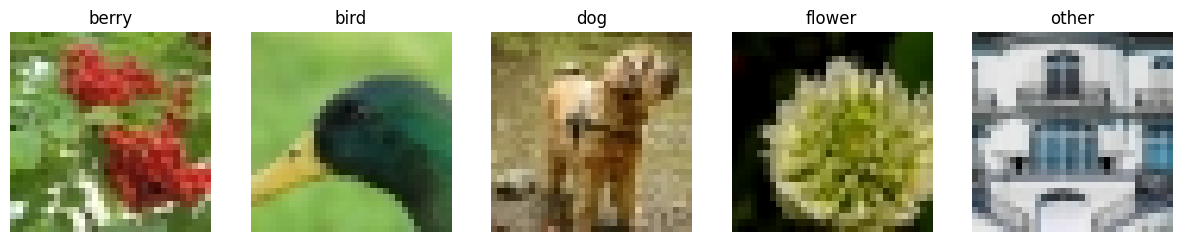

In [4]:
from torchvision.utils import make_grid

# Function to denormalize image
def denormalize(img):
    img = img /2 + 0.5  # Reverse the normalization
    img = np.clip(img, 0, 1)  # Ensure values are in [0,1] range
    return img

plotted_classes = set()

fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

for images, labels in trainloader:
    for i in range(len(images)):
        label = labels[i].item()
        if label not in plotted_classes:
            img = images[i].numpy().transpose((1, 2, 0))
            img = denormalize(img)  # Reverse normalization
            
            # Plot image
            ax = axes[label]
            ax.imshow(img)
            ax.set_title(trainset.classes[label])
            ax.axis("off")
            
            plotted_classes.add(label)
            break
    if len(plotted_classes) == len(classes):
        break

plt.show()

***
### Question 2 [0.5 point]

`transforms.ToTensor()` converts an image from a PIL image to a PyTorch tensor, changes pixel from 0-255 to 0-1, and uses (C, H, W) as shape for the tensor. This is the required input dtype for our torch neural network.

`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))` normalizes the image using mean = (0.5, 0.5, 0.5) and std = (0.5, 0.5, 0.5) for each channel (R, G, B). 
i.e. `img = (img-0.5)/0.5`. This now transforms the pixel range into $[-1,1]$, a good range for stable gradients and better convergence.

`transforms.Compose` takes those 2 transforms and apply them sequentially to images.

***
### Question 3 [1 point]

In [5]:
class MyCNN(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(F.relu(self.conv2(x)))
        
        x = F.relu(self.conv3(x))
        x = self.pool2(F.relu(self.conv4(x)))
        
        x = F.relu(self.conv5(x))
        x = self.pool3(F.relu(self.conv6(x)))
        
        x = torch.flatten(x, start_dim=1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Output raw logits
        
        return x





In [6]:
model = MyCNN()
model = model.to(device)
sample_input = torch.randn(1, 3, 32, 32)
sample_input = sample_input.to(device)
output = model(sample_input)
print(output.shape)  
# Should be [1, 5] (1 sample, 5 class predictions)

torch.Size([1, 5])


***
### Question 4 [0.5 point]

In [7]:
import torchsummary
torchsummary.summary(model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
            Conv2d-2           [-1, 64, 32, 32]          18,496
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]          73,856
            Conv2d-5          [-1, 128, 16, 16]         147,584
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
            Conv2d-8            [-1, 256, 8, 8]         590,080
         MaxPool2d-9            [-1, 256, 4, 4]               0
           Linear-10                  [-1, 512]       2,097,664
           Linear-11                   [-1, 64]          32,832
           Linear-12                    [-1, 5]             325
Total params: 3,256,901
Trainable params: 3,256,901
Non-trainable params: 0
---------------------------

***
### Question 5 [0.5 point]

In [8]:

def train(myCNN, nr_epochs, optimizer, criterion, trainloader):
    myCNN.to(device)  # Move model to the appropriate device
    myCNN.train()  # Set the model to training mode
    losses = []
    for epoch in range(nr_epochs):
        print(f"Epoch {epoch} of {nr_epochs}")

        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = myCNN(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters

            losses.append(loss.item())
            if i % 10 == 0:
                print(f"  Iteration {i} loss: {loss.item():.4f}")

    print("Training complete!")


***
### Question 6 [0.5 point]

In [9]:
train(model, nr_epochs=30, optimizer=optim.Adam(model.parameters(), lr=0.001), criterion=nn.CrossEntropyLoss(), trainloader=trainloader)

Epoch 0 of 30
  Iteration 0 loss: 1.6061
  Iteration 10 loss: 1.5579
  Iteration 20 loss: 1.5790
  Iteration 30 loss: 1.5181
  Iteration 40 loss: 1.5069
Epoch 1 of 30
  Iteration 0 loss: 1.4318
  Iteration 10 loss: 1.3242
  Iteration 20 loss: 1.4913
  Iteration 30 loss: 1.3741
  Iteration 40 loss: 1.3421
Epoch 2 of 30
  Iteration 0 loss: 1.2343
  Iteration 10 loss: 1.3428
  Iteration 20 loss: 1.3776
  Iteration 30 loss: 1.4146
  Iteration 40 loss: 1.3078
Epoch 3 of 30
  Iteration 0 loss: 1.4012
  Iteration 10 loss: 1.2771
  Iteration 20 loss: 1.3159
  Iteration 30 loss: 1.3674
  Iteration 40 loss: 1.3102
Epoch 4 of 30
  Iteration 0 loss: 1.3514
  Iteration 10 loss: 1.2324
  Iteration 20 loss: 1.2225
  Iteration 30 loss: 1.2082
  Iteration 40 loss: 1.1988
Epoch 5 of 30
  Iteration 0 loss: 1.1048
  Iteration 10 loss: 1.1542
  Iteration 20 loss: 1.3170
  Iteration 30 loss: 1.2206
  Iteration 40 loss: 1.1477
Epoch 6 of 30
  Iteration 0 loss: 1.2065
  Iteration 10 loss: 1.0619
  Iteration 2

***
### Question 7 [0.5 point]

In [10]:
import torch

def accuracy(model, testloader):
    model.to(device)
    model.eval()  # Set the model to evaluation mode

    # Initialize per-class accuracy trackers
    num_classes = 5
    class_correct = torch.zeros(num_classes, dtype=torch.int32)
    class_total = torch.zeros(num_classes, dtype=torch.int32)

    with torch.no_grad():  # No need to track gradients
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1) 

            # Update per-class accuracy
            for class_idx in range(num_classes):
                mask = (labels == class_idx)  # Create a mask for this class
                class_correct[class_idx] += (predicted[mask] == class_idx).sum().item()
                class_total[class_idx] += mask.sum().item()

    # Print per-class accuracy
    for idx, class_name in enumerate(testloader.dataset.classes):
        accuracy = (class_correct[idx] / class_total[idx]) * 100
        print(f"Accuracy for class '{class_name}': {accuracy:.2f}%")


In [11]:
accuracy(model, testloader)

Accuracy for class 'berry': 74.00%
Accuracy for class 'bird': 54.25%
Accuracy for class 'dog': 73.00%
Accuracy for class 'flower': 75.25%
Accuracy for class 'other': 59.00%


***
## Part 2: Fine-tuning a pretrained model [3.5 points]

### Question 1 [0.5 point]

In [12]:
root_train_small = "Linnaeus_5_32X32_small/Linnaeus 5 32X32/train"
root_test_small = "Linnaeus_5_32X32_small/Linnaeus 5 32X32/test"

batch_size = 128

trainset = torchvision.datasets.ImageFolder(root=root_train_small, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.ImageFolder(root=root_test_small, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False,)

classes = ('dog', 'flower')

***
### Question 2 [1 point]

In [13]:
class MyMLP(nn.Module):
    def __init__(self, input_size=64, hidden_size=128, output_size=2):
        super(MyMLP, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # output log probabilities
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

2.1 The input nodes is set to 64, as this is the output size of the penultimate layer of our CNN (before classification). This is essentially the feature embedding through the pre-trained CNN, in the CNN's feature space. This contains high-level abstract features extracted by the CNN.

Note I did not use the output layer of CNN, which is basically CNN's prediction probabilities for the 5 class classification problem, and is not really a feature embedding of the input image in the CNN's feature space. We lose a lot of information if we do not use the (64,), but use the output (5,) vector as the CNN feature for the image.

2.2 Since we are using Negative Log Likelihood Loss for training, we need to ensure that the MLP outputs log probabilitie. We hence use log_softmax as activation，which is the standard for NLLLoss

2.3

In [14]:
mlp = MyMLP()
mlp = mlp.to(device)
torchsummary.summary(mlp, (64,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           8,320
            Linear-2                  [-1, 128]          16,512
            Linear-3                    [-1, 2]             258
Total params: 25,090
Trainable params: 25,090
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.10
Estimated Total Size (MB): 0.10
----------------------------------------------------------------


***
### Question 3 [0.5 point]

we first define a function that takes the CNN and outputs its penultimate layer (embedding)

In [15]:
def get_embedding(myCNN, inputs):
    '''Get the embedding from the penultimate layer of the CNN.'''
    myCNN.eval()
    # manual forward pass till penultimate layer
    x = F.relu(myCNN.conv1(inputs))
    x = myCNN.pool1(F.relu(myCNN.conv2(x)))

    x = F.relu(myCNN.conv3(x))
    x = myCNN.pool2(F.relu(myCNN.conv4(x)))

    x = F.relu(myCNN.conv5(x))
    x = myCNN.pool3(F.relu(myCNN.conv6(x)))

    x = torch.flatten(x, start_dim=1)  
    x = F.relu(myCNN.fc1(x))  
    x = myCNN.dropout(x)  
    cnn_outputs = F.relu(myCNN.fc2(x))
    return cnn_outputs

In [16]:
def fine_tune(myCNN, myMLP, nr_epochs, optimizer, criterion, trainloader):
    myCNN.to(device) 
    myCNN.eval()  
    myMLP.to(device)  
    myMLP.train()
    
    for epoch in range(nr_epochs):
        print(f"Epoch {epoch}")
        losses = []

        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

            # Extract features from CNN
            cnn_outputs = get_embedding(myCNN, inputs)

            # Train MLP on CNN features
            optimizer.zero_grad()
            outputs = myMLP(cnn_outputs)
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters

            losses.append(loss.item())
            if i % 10 == 0:
                print(f"  Iteration {i} loss: {loss.item():.4f}")
    
    print("Fine-tuning complete.")


***
### Question 4 [0.5 point]

In [17]:
fine_tune(model, mlp, nr_epochs=30, 
          optimizer=optim.Adam(mlp.parameters(), lr=0.001),
            criterion=nn.NLLLoss(), trainloader=trainloader)

Epoch 0
  Iteration 0 loss: 0.7050
  Iteration 10 loss: 0.0122
Epoch 1
  Iteration 0 loss: 0.0022
  Iteration 10 loss: 0.0004
Epoch 2
  Iteration 0 loss: 0.0011
  Iteration 10 loss: 0.0003
Epoch 3
  Iteration 0 loss: 0.0001
  Iteration 10 loss: 0.0000
Epoch 4
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0004
Epoch 5
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0006
Epoch 6
  Iteration 0 loss: 0.0001
  Iteration 10 loss: 0.0000
Epoch 7
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0000
Epoch 8
  Iteration 0 loss: 0.0001
  Iteration 10 loss: 0.0000
Epoch 9
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0000
Epoch 10
  Iteration 0 loss: 0.0001
  Iteration 10 loss: 0.0000
Epoch 11
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0001
Epoch 12
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0001
Epoch 13
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0000
Epoch 14
  Iteration 0 loss: 0.0000
  Iteration 10 loss: 0.0000
Epoch 15
  Iteration 0 loss: 0.0000
  Iteration 10

***
### Question 5 [1 point]

In [18]:
def accuracy_fine_tune(myCNN, myMLP, testloader_small):
    num_classes = 2
    class_correct = torch.zeros(num_classes, dtype=torch.int32)
    class_total = torch.zeros(num_classes, dtype=torch.int32)
    myCNN.to(device)
    myMLP.to(device)
    with torch.no_grad():
        for images, labels in testloader_small:
            images, labels = images.to(device), labels.to(device)
            cnn_outputs = get_embedding(myCNN, images)
            outputs = myMLP(cnn_outputs)
            _, predicted = torch.max(outputs, 1)

            # Update per-class accuracy
            for class_idx in range(num_classes):
                mask = (labels == class_idx)  # Create a mask for this class
                class_correct[class_idx] += (predicted[mask] == class_idx).sum().item()
                class_total[class_idx] += mask.sum().item()

    # Print per-class accuracy
    for idx, class_name in enumerate(testloader_small.dataset.classes):
        accuracy = (class_correct[idx] / class_total[idx]) * 100
        print(f"Accuracy for class '{class_name}': {accuracy:.4f}%")


accuracy_fine_tune(model, mlp, testloader)

Accuracy for class 'dog': 96.5000%
Accuracy for class 'flower': 96.2500%


We recall that CNN's accuracy:  
Accuracy for class 'dog': 75.50%
Accuracy for class 'flower': 76.50%

So the finetuned MLP has around 20% higher accuracy for each class. This is however due to both the fact that this is a binary classification, so the model should expect higher accuracy, and the fact that it is finetuned on the smaller binary dataset

***
## Part 3: Adversarial attacks [4.5 points]

***
### Question 1 [1 point]

In [20]:
def adversarial(myCNN, myMLP, image, label, epsilon=0.05):
    image = image.clone().detach().requires_grad_(True).to(device)
    nr_steps = 10
    mu = 1.0
    alpha = epsilon / nr_steps  # Step size
    g = torch.zeros_like(image, device=device)  # Initialize momentum

    for i in range(nr_steps):
        if image.grad is not None:
            image.grad.zero_()

        # unsqueeze to add batch dimension
        output = myMLP(get_embedding(myCNN, image.unsqueeze(0)))
        loss = nn.NLLLoss()(output, label.unsqueeze(0))
        loss.backward()
        grad = image.grad.detach() # grad w.r.t. input image
        grad = grad / (torch.norm(grad, p=1) + 1e-8)  # Normalize grad
        g = mu * g + grad  # Update momentum
        image = image + alpha * torch.sign(g)  # Apply perturbation

        image = image.detach().requires_grad_(True)  # Reset requires_grad

    with torch.no_grad():
        output = myMLP(get_embedding(myCNN, image.unsqueeze(0)))
        p = torch.exp(output) # output was log prob
        p = p[0, label.item()].item() # model's prob of true class


    image = image.detach().cpu()
    return image, p


***
### Question 2 [1 point]

$ \epsilon$ is the maximum perturbation allowed in the adversarial attack. It defines the strength of the attack by limiting how much each pixel can be modified.

If 
$ \epsilon$ is small, the perturbation is subtle and harder to detect.
Otherwise, the perturbation is stronger but might make the attack more noticeable.
The constraint $ || x^* - x||_{\infty} \leq \epsilon $ ensures that the adversarial image stays within a small neighborhood around the original image.

The MI-FGSM Algorithm is very similar to gradient descent with momentum: both use scaled past gradients to stabilize updates. 

Gradient Descent with Momentum:
$$
v_{t+1} = \mu v_t - \eta \nabla J(\theta_t)
$$

$$
\theta_{t+1} = \theta_t + v_{t+1}
$$

MI-FGSM Algorithm:
$$
g_{t+1} = \mu g_t + \frac{\nabla_x J(x_t^*, y)}{\|\nabla_x J(x_t^*, y)\|_1}
$$

$$
x_{t+1}^* = x_t^* + \alpha \cdot \text{sign}(g_{t+1})
$$

We can see that in MI-FGSM Algorithm, $\eta$ is chosen to be the inverse of $L1$ norm, 
and uses the sign of the velocity for updates. 
Additionally, adding past gradients scaled by $\mu$, or using an exponentially decay accumulation of past gradients, are to stabilize the attack and avoid rapid changes. $\mu$ controls how much we want to stabilize, with larger $\mu$ preventing large changes and vice versa

***
### Question 3 [0.5 point]

In [21]:
def show_images(original, adversarial, prob):
    """Display original and adversarial images side by side."""
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))  

    # Convert tensors to NumPy arrays
    original_np = original.cpu().numpy().transpose((1, 2, 0))
    adversarial_np = adversarial.cpu().numpy().transpose((1, 2, 0))

    # Plot original image
    axes[0].imshow(denormalize(original_np))
    axes[0].set_title("Original")
    axes[0].axis("off")

    # Plot adversarial image
    axes[1].imshow(denormalize(adversarial_np))
    axes[1].set_title(f"Adversarial\nProb={prob:.4f}")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


Searching for a dog image...
found a dog image which MLP is correct
Probability of true label after attack = 0.0000
Plotting results:


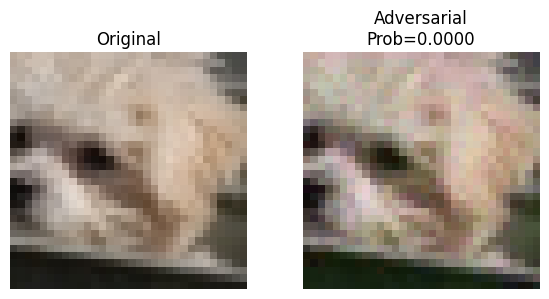

In [22]:
# fig, axes = plt.subplots(1, len(classes), figsize=(5, 5))
for images, labels in testloader:
    print("Searching for a dog image...")
    for i in range(len(images)):
        label = labels[i].item()
        if testset.classes[label] == "dog":
            # check if mlp is correct
            img = images[i].to(device)
            lab = labels[i].to(device) # move label to device
            if (mlp(get_embedding(model, img
                                  .unsqueeze(0))).argmax().item()) == label:
                print("found a dog image which MLP is correct")

                image_adv, p = adversarial(model, mlp, img, lab)
                print(f"Probability of true label after attack = {p:.4f}")
                
                if p < 0.5:
                    print("Plotting results:")
                    show_images(img, image_adv, p)
                    break
    break


***
### Question 4 [0.5 point]

In [23]:
def accuracy_adversarial(myCNN, myMLP, testloader_small, epsilon=0.05):
    myCNN.eval()
    myMLP.eval()
    
    total_correct  = 0
    total_attacked = 0

    for images, labels in testloader_small:
        images, labels = images.to(device), labels.to(device)
        for i in range(len(images)):
            img, lab = images[i], labels[i]
            if (mlp(get_embedding(model, img.unsqueeze(0))).argmax().item()) == label:
                total_correct += 1 # mlp was correct 
                image_adv, p = adversarial(model, mlp, img, lab, epsilon=epsilon)
                if p < 0.5:
                    total_attacked += 1 # attack was successful
    if total_correct == 0:
        return 0.0
    return total_attacked / total_correct


In [24]:
attack_rate = accuracy_adversarial(model, mlp, testloader, epsilon=0.05)
print(f"Attack rate at epsilon=0.05: {attack_rate:.4f}")

Attack rate at epsilon=0.05: 0.9352


***
### Question 5 [1 point]

Epsilon: 0.02, Attack success rate: 39.6509%
Epsilon: 0.04, Attack success rate: 83.2918%
Epsilon: 0.06, Attack success rate: 97.5062%
Epsilon: 0.08, Attack success rate: 98.7531%
Epsilon: 0.1, Attack success rate: 98.7531%


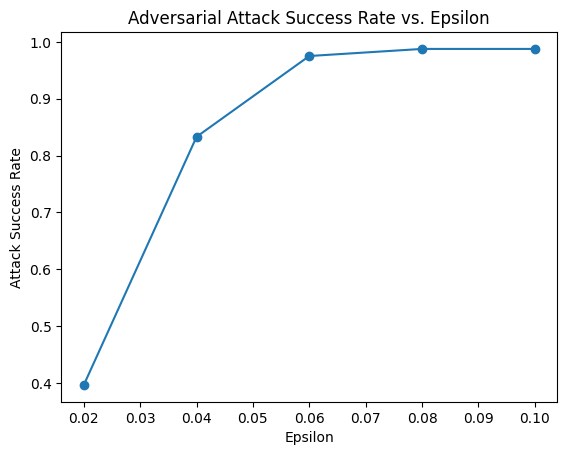

In [25]:
epsilons = [0.02, 0.04, 0.06, 0.08, 0.1]
attack_rates = []

for eps in epsilons:
    ar = accuracy_adversarial(model, mlp, testloader, epsilon=eps)
    attack_rates.append(ar)
    print(f"Epsilon: {eps}, Attack success rate: {ar:.4%}")

plt.plot(epsilons, attack_rates, marker='o')
plt.xlabel("Epsilon")
plt.ylabel("Attack Success Rate")
plt.title("Adversarial Attack Success Rate vs. Epsilon")
plt.show()

From the plot, we notice that attack success rate is non-decreasing w.r.t. $\epsilon$, from the low of 0.4 at $\epsilon = 0.02$, reaching as high as around 0.93 with $\epsilon$ = 0.06. Further increasing eps does not yield very visible increase in attack rate.

In general, within the range [0, 0.1], larger $ \epsilon $ allows for stronger perturbations, hence confusing the classifier. Further increasing does not lead to improvement.

***
### Question 6 [0.5 point]

Adversarial attacks are a big challenge when deploying machine learning in security-critical fields. A few real-world examples include:

- Facial Recognition & Authentication: Attackers can subtly modify an image to fool face recognition or fingerprint scanners, especially when people are using face ID to make payments (like alipay in China). Attackers may use adversarial attacks to fool the clasifier and make false payments.

- Self-Driving Cars: An autonomous vehicle may misread road situations when there is small distortion, leading to dangerous decisions.

Other examples include the use of AI experts in hospitals, clinical research etc, and in finance, where criminals may want to fool the fraud detection models. 

How Can We Defend Against These Attacks?  
We want to teach the model to recognize adversarial examples by including them in training, helping it learn more robust patterns. We can also use ensemble Models: Use multiple models instead of just one—this makes it harder for attackers to fool the system since different models won’t be tricked in the same way. The idea of ensemble models, eg. random forests, is to use independent models trained on different subset of features and different subsets of data.

Ideally your models independently understand different aspects of data, so that the ensemble is less prone to overfitting and generalizes better. When you have an attack rate of $p$, this scales down to $O(p^n)$ with $n$ being the number of models in your ensemble